# 0. Installs, Imports and API Keys

In [1]:
# RUN THIS CELL FIRST!
!pip install -q langchain==0.0.150 pypdf pandas matplotlib tiktoken textract transformers openai faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.4/648.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 41.2

In [2]:
!pip uninstall openai

!pip install -Iv  openai==0.27.8

Found existing installation: openai 1.20.0
Uninstalling openai-1.20.0:
  Would remove:
    /usr/local/bin/openai
    /usr/local/lib/python3.10/dist-packages/openai-1.20.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/openai/*
Proceed (Y/n)? Y
  Successfully uninstalled openai-1.20.0
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPT2TokenizerFast
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains.question_answering import load_qa_chain
from langchain.llms import OpenAI
from langchain.chains import ConversationalRetrievalChain

In [14]:
os.environ["OPENAI_API_KEY"] = "sk-proj-LwT6WGGPJa5Uosn83czRT3BlbkFJoUHsDkfTAat0n44Qx5LW"

# 1. Loading PDFs and chunking with LangChain

In [18]:
# You MUST add your PDF to local files in this notebook (folder icon on left hand side of screen)

# Simple method - Split by pages
loader = PyPDFLoader("/content/Chemistry-NCERT-1-240.pdf")
pages = loader.load_and_split()
print(pages[0])

# SKIP TO STEP 2 IF YOU'RE USING THIS METHOD
chunks = pages

page_content='After studying this Unit, you will be\nable to\n·describe the formation of different\ntypes of solutions;\n·express concentration of solution\nin different units;\n·state and explain Henry’s law and\nRaoult’s law;\n·distinguish between ideal and\nnon-ideal solutions;\n·explain deviations of real solutions\nfrom Raoult’s law;\n·describe colligative properties of\nsolutions and correlate these with\nmolar masses of the solutes;\n·explain abnormal colligative\nproperties exhibited by some\nsolutes in solutions.In normal life we rarely come across pure substances.\nMost of these are mixtures containing two or more pure\nsubstances. Their utility or importance in life depends\non their composition. For example, the properties of\nbrass (mixture of copper and zinc) are quite different\nfrom those of Ger man silver (mixtur e of copper , zinc\nand nickel) or bronze (mixture of copper and tin);\n1 part per million (ppm) of fluoride ions in water\nprevents tooth decay, while 1.5 pp

In [19]:
!pip install textract
!pip install pdfminer.six

In [20]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [21]:
# Step 1: Convert PDF to text
import textract
file_path = "/content/Chemistry-NCERT-1-240.pdf"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")
# Try using pdftotext first
try:
    doc = textract.process(file_path, method="pdftotext")
except ShellError:
    # If pdftotext fails, try using pdfminer
    doc = textract.process(file_path, method="pdfminer")

# Step 2: Save to .txt and reopen (helps prevent issues)
with open('attention_is_all_you_need.txt', 'w') as f:
    f.write(doc.decode('utf-8'))

with open('attention_is_all_you_need.txt', 'r') as f:
    text = f.read()

# Step 3: Create function to count tokens
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))

# Step 4: Split text into chunks
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 512,
    chunk_overlap  = 24,
    length_function = count_tokens,
)

chunks = text_splitter.create_documents([text])

In [22]:
# Result is many LangChain 'Documents' around 500 tokens or less (Recursive splitter sometimes allows more tokens to retain context)
type(chunks[0])

langchain.schema.Document

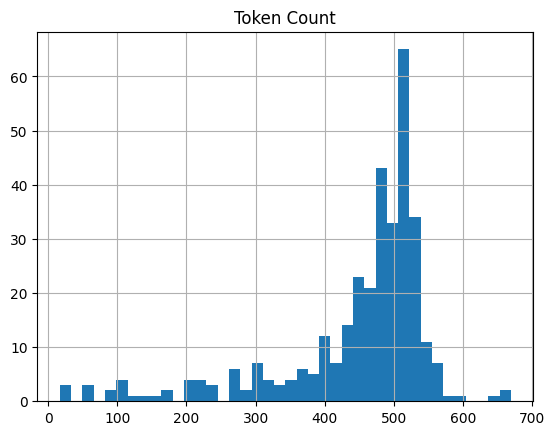

In [23]:
# Quick data visualization to ensure chunking was successful

# Create a list of token counts
token_counts = [count_tokens(chunk.page_content) for chunk in chunks]

# Create a DataFrame from the token counts
df = pd.DataFrame({'Token Count': token_counts})

# Create a histogram of the token count distribution
df.hist(bins=40, )

# Show the plot
plt.show()

# 2. Embed text and store embeddings

In [24]:
# Get embedding model
embeddings = OpenAIEmbeddings()

# Create vector database
db = FAISS.from_documents(chunks, embeddings)

# 3. Setup retrieval function

In [25]:
# Check similarity search is working
query = "D Block"
docs = db.similarity_search(query)
docs[0]

Document(page_content='Rationalised 2023-24\n\nThe d- and f- Block Elements', metadata={})

In [26]:
# Create QA chain to integrate similarity search with user queries (answer query from knowledge base)

chain = load_qa_chain(OpenAI(model="gpt-3.5-turbo-instruct",temperature=0), chain_type="stuff")

query = "D Block"
docs = db.similarity_search(query)

chain.run(input_documents=docs, question=query)

                    model was transfered to model_kwargs.
                    Please confirm that model is what you intended.


' The d-block of the periodic table contains the elements of the groups 3-12 in which the d orbitals are progressively filled in each of the four long periods. The f-block consists of elements in which 4 f and 5 f orbitals are progressively filled. They are placed in a separate panel at the bottom of the periodic table. The names transition metals and inner transition metals are often used to refer to the elements of d-and f-blocks respectively.'

# 5. Create chatbot with chat memory (OPTIONAL)

In [27]:
from IPython.display import display
import ipywidgets as widgets

# Create conversation chain that uses our vectordb as retriver, this also allows for chat history management
qa = ConversationalRetrievalChain.from_llm(OpenAI(model="gpt-3.5-turbo-instruct",temperature=0.1), db.as_retriever())

                    model was transfered to model_kwargs.
                    Please confirm that model is what you intended.


In [28]:
chat_history = []

def on_submit(_):
    query = input_box.value
    input_box.value = ""

    if query.lower() == 'exit':
        print("Thank you for using the State of the Union chatbot!")
        return

    result = qa({"question": query, "chat_history": chat_history})
    chat_history.append((query, result['answer']))

    display(widgets.HTML(f'<b>User:</b> {query}'))
    display(widgets.HTML(f'<b><font color="blue">Chatbot:</font></b> {result["answer"]}'))

print("Welcome to the Transformers chatbot! Type 'exit' to stop.")

input_box = widgets.Text(placeholder='Please enter your question:')
input_box.on_submit(on_submit)

display(input_box)

Welcome to the Transformers chatbot! Type 'exit' to stop.


Text(value='', placeholder='Please enter your question:')

HTML(value='<b>User:</b> Tell me the configuration of d and f block elements')

HTML(value='<b><font color="blue">Chatbot:</font></b>  The d-block elements have their outermost electrons in …

HTML(value='<b>User:</b> What is electronic configuration of iron')

HTML(value='<b><font color="blue">Chatbot:</font></b>  An example of an element in the d-block is iron (Fe), w…

HTML(value='<b>User:</b> Explain nucleophilic substitution')

HTML(value='<b><font color="blue">Chatbot:</font></b>  Nucleophilic substitution is a type of chemical reactio…